In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analysing Timezone for the stores

              store_id    timezone_str
0  8139926242460185114     Asia/Beirut
1  5415949628544298339   America/Boise
2  3408529570017053440  America/Denver
3  9055649751952768824  America/Denver
4  4428372089193592098  America/Denver
Total rows in the csv: 13559
timezone_str
America/New_York                8191
America/Los_Angeles             3224
America/Chicago                 1517
America/Phoenix                  418
America/Denver                   127
America/Detroit                   62
America/Indiana/Indianapolis      15
America/Edmonton                   2
Asia/Beirut                        1
America/Boise                      1
Pacific/Honolulu                   1
Name: count, dtype: int64


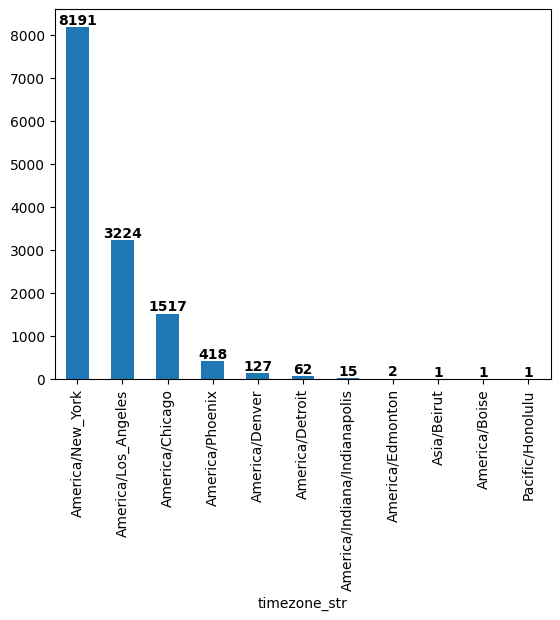

In [29]:
# read the csv file
df = pd.read_csv('./data/bq-results-20230125-202210-1674678181880.csv')

# print the first 5 rows of the dataframe
print(df.head())

print("Total rows in the csv:", df.shape[0])

# print all unique values in timezone_str column
print(df['timezone_str'].value_counts())

# plot histogram of timezone_str column
df['timezone_str'].value_counts().plot(kind='bar')

# show the number above each bar
for i, v in enumerate(df['timezone_str'].value_counts()):
    plt.text(i, v+1, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()







## Analyzing the business hours of all the stores 

/tmp/ipykernel_342704/3358965992.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_time_local'] = pd.to_datetime(df['start_time_local'])
/tmp/ipykernel_342704/3358965992.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_time_local'] = pd.to_datetime(df['end_time_local'])


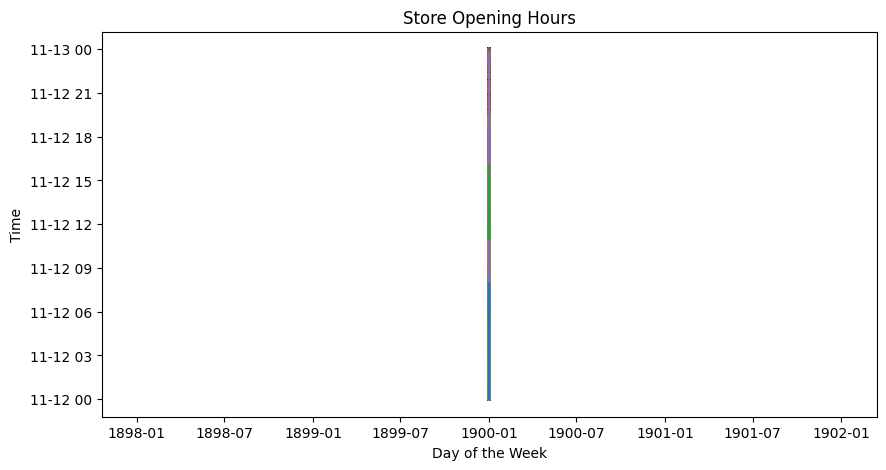

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser
import pytz

# Load the data into a pandas DataFrame
data = pd.read_csv('./data/Menu hours.csv')

# Convert your data into a pandas DataFrame
df = pd.DataFrame(data)

# Convert your 'day', 'start_time_local', and 'end_time_local' columns into datetime
df['start_time_local'] = pd.to_datetime(df['start_time_local'])
df['end_time_local'] = pd.to_datetime(df['end_time_local'])
df['day'] = pd.to_datetime(df['day'], format='%w')

# Plot your data
plt.figure(figsize=(10,5))
for store in df['store_id'].unique():
    store_data = df[df['store_id'] == store]
    plt.plot_date(store_data['day'], store_data['start_time_local'], '-')
    plt.plot_date(store_data['day'], store_data['end_time_local'], '-')

plt.title('Store Opening Hours')
plt.xlabel('Day of the Week')
plt.ylabel('Time')
plt.show()
